In [1]:
import os
import zipfile
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Download the dataset from Kaggle
os.system('kaggle datasets download -d gauravmalik26/food-delivery-dataset')

# Step 2: Extract the ZIP file
with zipfile.ZipFile('food-delivery-dataset.zip', 'r') as zip_ref:
    zip_ref.extractall('food_delivery_dataset')

# Step 3: List the files in the extracted directory to find the correct CSV file name
extracted_dir = 'food_delivery_dataset'
files = os.listdir(extracted_dir)
print("Extracted files:", files)

# Step 4: Use the correct file from the extracted list
csv_file_path = f"{extracted_dir}/train.csv"  # Replace with 'train.csv' since it's one of the files

# Step 5: Create a DataFrame from the extracted CSV file
df = pd.read_csv(csv_file_path)

# Display the first few rows of the DataFrame
print(df.head())


Extracted files: ['Sample_Submission.csv', 'test.csv', 'train.csv']
        ID Delivery_person_ID Delivery_person_Age Delivery_person_Ratings  \
0  0x4607     INDORES13DEL02                   37                     4.9   
1  0xb379     BANGRES18DEL02                   34                     4.5   
2  0x5d6d     BANGRES19DEL01                   23                     4.4   
3  0x7a6a    COIMBRES13DEL02                   38                     4.7   
4  0x70a2     CHENRES12DEL01                   32                     4.6   

   Restaurant_latitude  Restaurant_longitude  Delivery_location_latitude  \
0            22.745049             75.892471                   22.765049   
1            12.913041             77.683237                   13.043041   
2            12.914264             77.678400                   12.924264   
3            11.003669             76.976494                   11.053669   
4            12.972793             80.249982                   13.012793   

   Delivery_

Average multiple deliveries by time of day:
  time_of_day  multiple_deliveries
0   afternoon             0.729839
1     evening             0.775123
2     morning             0.630073


<Figure size 800x600 with 0 Axes>

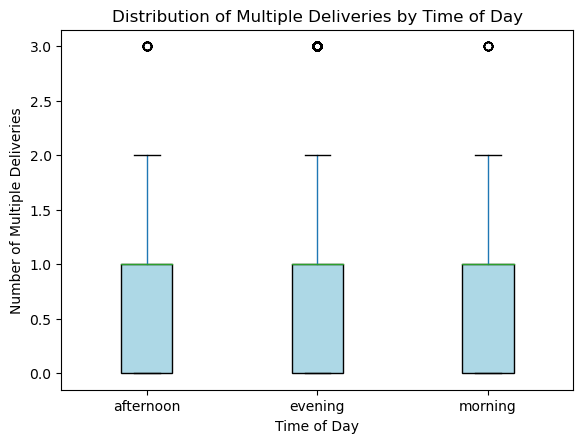

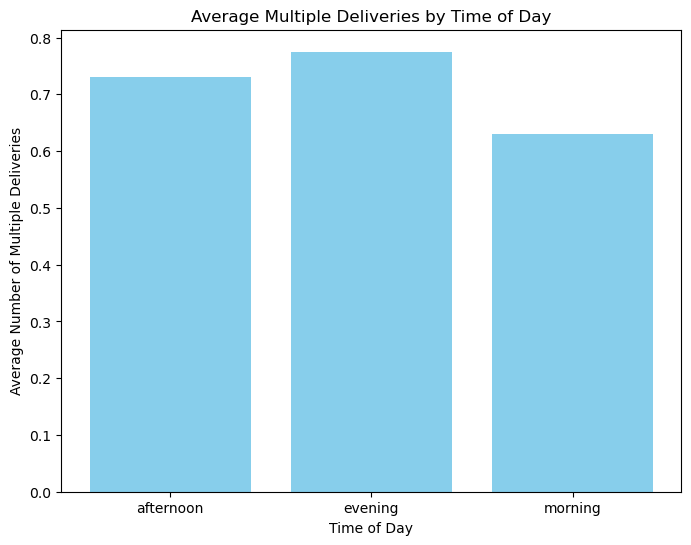

In [2]:
# Hypothesis-1 The multiple deliveries are among afternoon  morning and evening times
import pandas as pd
import matplotlib.pyplot as plt

# Define the directory and CSV file path
extracted_dir = 'food_delivery_dataset'  # Set to the folder where files were extracted
csv_file_path = f"{extracted_dir}/train.csv"
df = pd.read_csv(csv_file_path)

# Convert 'multiple_deliveries' to numeric, handling non-numeric values if necessary
df['multiple_deliveries'] = pd.to_numeric(df['multiple_deliveries'], errors='coerce')

# Drop rows with NaN values in 'multiple_deliveries'
df = df.dropna(subset=['multiple_deliveries'])

# Extract hour from 'Time_Orderd' to define time of day
df['Order_Hour'] = pd.to_datetime(df['Time_Orderd'], errors='coerce').dt.hour

# Define time of day based on 'Order_Hour'
def categorize_time_of_day(hour):
    if pd.isna(hour):
        return None
    elif hour < 12:
        return 'morning'
    elif 12 <= hour < 17:
        return 'afternoon'
    else:
        return 'evening'

df['time_of_day'] = df['Order_Hour'].apply(categorize_time_of_day)

# Group by 'time_of_day' and calculate the average multiple deliveries
grouped_time_data = df.groupby('time_of_day')['multiple_deliveries'].mean().reset_index()
print("Average multiple deliveries by time of day:")
print(grouped_time_data)

# Plot the Box Plot: Distribution of Multiple Deliveries by Time of Day
plt.figure(figsize=(8, 6))
df.boxplot(column='multiple_deliveries', by='time_of_day', grid=False, patch_artist=True,
           boxprops=dict(facecolor='lightblue'))
plt.title('Distribution of Multiple Deliveries by Time of Day')
plt.suptitle('')  # Remove the default 'Boxplot grouped by...' title
plt.xlabel('Time of Day')
plt.ylabel('Number of Multiple Deliveries')
plt.show()

# Optional: Bar Plot for the Mean to reinforce insights
plt.figure(figsize=(8, 6))
plt.bar(grouped_time_data['time_of_day'], grouped_time_data['multiple_deliveries'], color='skyblue')
plt.title('Average Multiple Deliveries by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Average Number of Multiple Deliveries')
plt.show()


The box plot shows the distribution of multiple deliveries by time of day, with afternoon, evening, and morning having similar medians and spread, though each has outliers. The bar chart below displays the average multiple deliveries by time of day, with evening slightly higher than afternoon and morning being the lowest. This suggests that while all times have similar distributions, evenings may slightly favor multiple deliveries.

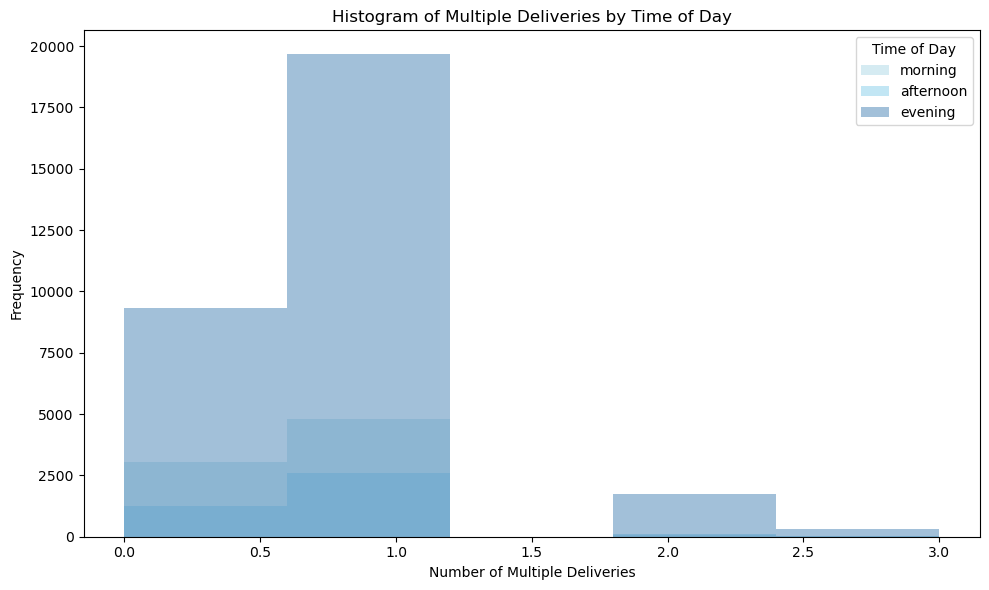

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is already loaded and processed with 'time_of_day' and 'multiple_deliveries' columns

# Plot Histogram: Frequency of Multiple Deliveries by Time of Day
plt.figure(figsize=(10, 6))

# Use different colors for each time of day
time_of_day_colors = {'morning': 'lightblue', 'afternoon': 'skyblue', 'evening': 'steelblue'}

# Plot a histogram for each time of day
for time_of_day, color in time_of_day_colors.items():
    subset = df[df['time_of_day'] == time_of_day]
    plt.hist(subset['multiple_deliveries'], bins=5, alpha=0.5, label=time_of_day, color=color)

plt.title('Histogram of Multiple Deliveries by Time of Day')
plt.xlabel('Number of Multiple Deliveries')
plt.ylabel('Frequency')
plt.legend(title='Time of Day')
plt.grid(False)
plt.tight_layout()
plt.show()


The histogram shows the frequency of multiple deliveries by time of day, with each time period (morning, afternoon, evening) represented by different shades of blue. Most deliveries involve only one or zero multiple deliveries, with very few instances of two or more. The frequency pattern is similar across all times of day, indicating that high counts of multiple deliveries are rare regardless of the time.

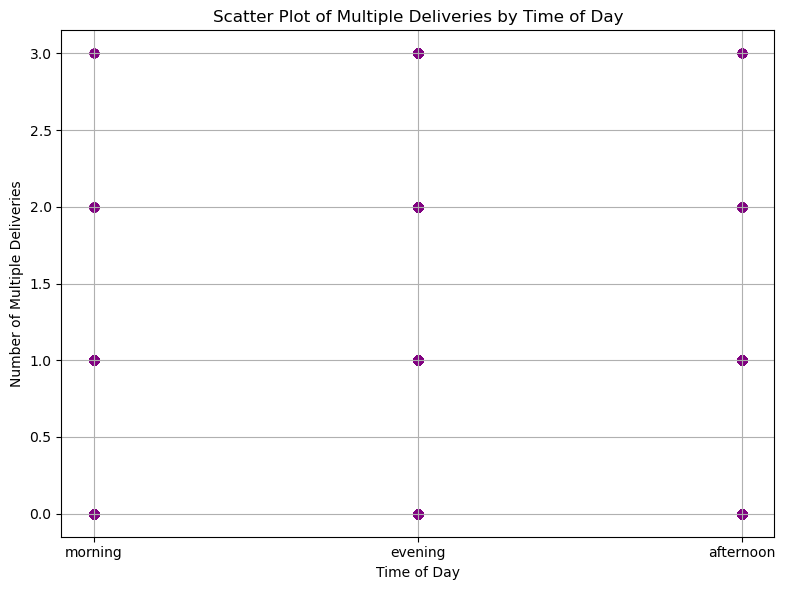

In [5]:
import matplotlib.pyplot as plt

# Drop rows with None values in 'time_of_day'
df = df.dropna(subset=['time_of_day', 'multiple_deliveries'])

# Scatter Plot: Multiple Deliveries by Time of Day
plt.figure(figsize=(8, 6))
plt.scatter(df['time_of_day'], df['multiple_deliveries'], color='purple', alpha=0.6)
plt.title('Scatter Plot of Multiple Deliveries by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Number of Multiple Deliveries')
plt.grid(True)
plt.tight_layout()
plt.show()


The scatter plot displays the number of multiple deliveries across different times of day (morning, afternoon, evening). Most data points are clustered at 0 or 1 multiple delivery, showing that higher multiple deliveries are rare across all times. The pattern is similar across morning, afternoon, and evening, indicating no significant difference in multiple deliveries by time of day.

Unique values in 'City' column after filtering: ['Urban ' 'Metropolitian ' 'Semi-Urban ']
Average customer ratings by location type:
             City  Delivery_person_Ratings
0  Metropolitian                  4.622826
1     Semi-Urban                  4.492105
2          Urban                  4.668676


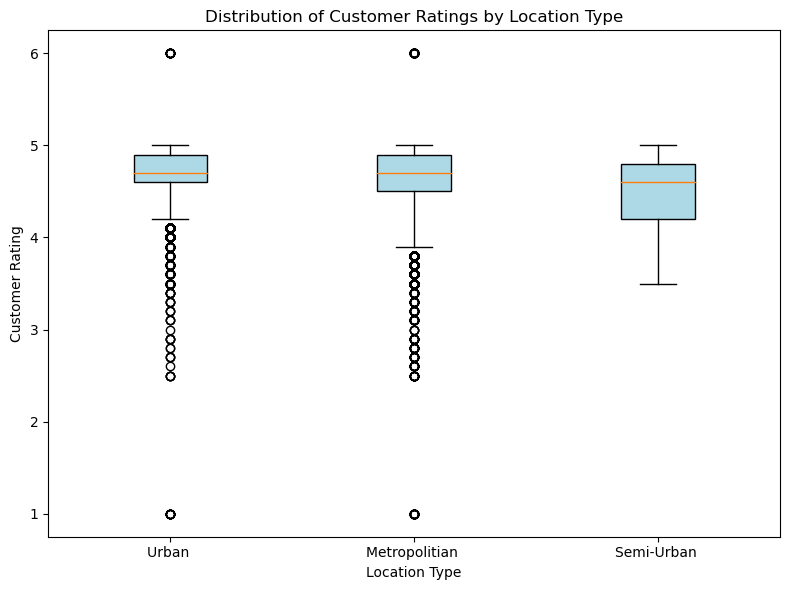

In [12]:
# Hypothesis-2 Customers in urban areas leave lower ratings compared to suburban areas.
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file
csv_file_path = f"{extracted_dir}/train.csv"
df = pd.read_csv(csv_file_path)

# Ensure columns are named correctly and filter out rows with missing or invalid City values
if 'City' in df.columns and 'Delivery_person_Ratings' in df.columns:
    # Convert 'Delivery_person_Ratings' to numeric and remove NaNs in 'Delivery_person_Ratings'
    df['Delivery_person_Ratings'] = pd.to_numeric(df['Delivery_person_Ratings'], errors='coerce')
    
    # Remove rows where 'City' is NaN or contains any 'NaN' as a string representation
    df = df.dropna(subset=['Delivery_person_Ratings'])  # Drop rows with NaNs in ratings
    df = df[~df['City'].str.strip().isin(['NaN', ''])]  # Remove rows where City is 'NaN' or empty
    
    # Check that 'NaN' is fully removed from the City column
    print("Unique values in 'City' column after filtering:", df['City'].unique())
    
    # Grouping the data by 'City' and calculating the average rating
    grouped_ratings_data = df.groupby('City')['Delivery_person_Ratings'].mean().reset_index()
    print("Average customer ratings by location type:")
    print(grouped_ratings_data)
    
    # Prepare data for box plot
    city_types = df['City'].unique()
    rating_data = [df[df['City'] == city]['Delivery_person_Ratings'].values for city in city_types]
    
    # Plot the box plot using matplotlib directly
    plt.figure(figsize=(8, 6))
    plt.boxplot(rating_data, labels=city_types, patch_artist=True, boxprops=dict(facecolor='lightblue'))
    plt.title('Distribution of Customer Ratings by Location Type')
    plt.xlabel('Location Type')
    plt.ylabel('Customer Rating')
    plt.tight_layout()
    plt.show()
else:
    print("The required columns 'City' and 'Delivery_person_Ratings' are not present in the dataset.")


The box plot shows the distribution of customer ratings across different location types: Urban, Metropolitan, and Semi-Urban. Urban and Metropolitan areas have a similar range, with a median rating around 4.5, but also show many low outliers, indicating some customers gave very low ratings. Semi-Urban areas have a slightly higher median and fewer low outliers, suggesting more consistent customer satisfaction in these areas.

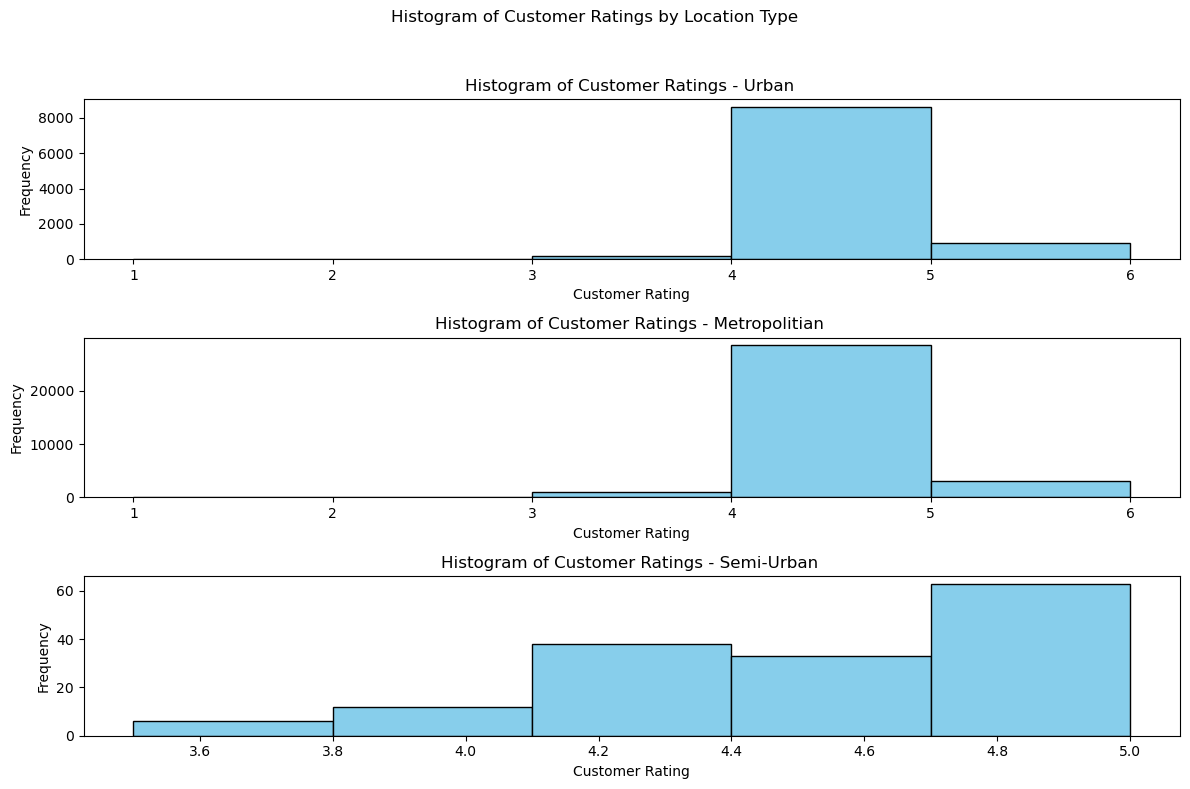

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file
csv_file_path = f"{extracted_dir}/train.csv"
df = pd.read_csv(csv_file_path)

# Ensure the required columns are present and filter out rows with missing values
if 'City' in df.columns and 'Delivery_person_Ratings' in df.columns:
    # Convert 'Delivery_person_Ratings' to numeric and drop rows with NaNs
    df['Delivery_person_Ratings'] = pd.to_numeric(df['Delivery_person_Ratings'], errors='coerce')
    df = df.dropna(subset=['City', 'Delivery_person_Ratings'])
    df = df[~df['City'].str.strip().isin(['NaN', ''])]  # Remove rows where City is 'NaN' or empty
    
    # Plotting Histogram: Frequency Distribution of Ratings by Location Type
    location_types = df['City'].unique()
    plt.figure(figsize=(12, 8))
    
    for i, location_type in enumerate(location_types, 1):
        plt.subplot(len(location_types), 1, i)
        subset = df[df['City'] == location_type]
        plt.hist(subset['Delivery_person_Ratings'], bins=5, edgecolor='black', color='skyblue')
        plt.title(f'Histogram of Customer Ratings - {location_type}')
        plt.xlabel('Customer Rating')
        plt.ylabel('Frequency')
    
    plt.suptitle('Histogram of Customer Ratings by Location Type')
    plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to fit the suptitle
    plt.show()
else:
    print("The required columns 'City' and 'Delivery_person_Ratings' are not present in the dataset.")


The histograms show the frequency distribution of customer ratings across different location types. Both Urban and Metropolitan areas have a high concentration of ratings around 4 to 5, with very few low ratings. In contrast, the Semi-Urban area shows a more even spread across ratings, with notable frequencies from 4.2 to 5, suggesting a slightly higher and more varied satisfaction level in these areas.

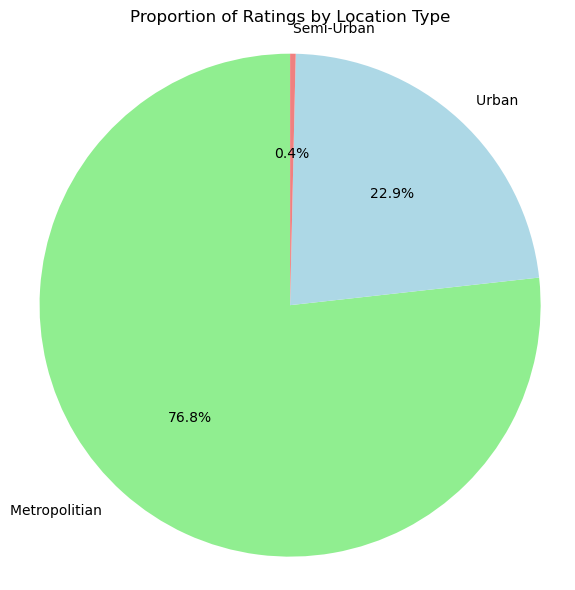

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file
csv_file_path = f"{extracted_dir}/train.csv"
df = pd.read_csv(csv_file_path)

# Ensure the required columns are present and filter out rows with missing values
if 'City' in df.columns and 'Delivery_person_Ratings' in df.columns:
    # Convert 'Delivery_person_Ratings' to numeric and drop rows with NaNs
    df['Delivery_person_Ratings'] = pd.to_numeric(df['Delivery_person_Ratings'], errors='coerce')
    df = df.dropna(subset=['City', 'Delivery_person_Ratings'])
    df = df[~df['City'].str.strip().isin(['NaN', ''])]  # Remove rows where City is 'NaN' or empty
    
    # Calculate the count of ratings by location type
    rating_counts = df['City'].value_counts()
    
    # Plotting Pie Chart: Proportion of Total Ratings by Location Type
    plt.figure(figsize=(6, 6))
    plt.pie(rating_counts, labels=rating_counts.index, autopct='%1.1f%%', startangle=90, colors=['lightgreen', 'lightblue', 'lightcoral'])
    plt.title('Proportion of Ratings by Location Type')
    plt.axis('equal')  # Equal aspect ratio ensures the pie chart is a circle
    plt.tight_layout()
    plt.show()
else:
    print("The required columns 'City' and 'Delivery_person_Ratings' are not present in the dataset.")


The pie chart illustrates the distribution of customer ratings by location type. The majority of ratings come from Metropolitan areas (76.8%), followed by Urban areas (22.9%), and a very small proportion from Semi-Urban areas (0.4%). This suggests that most customer interactions occur in Metropolitan regions.